Epoch 0, Loss: 0.576609
Epoch 500, Loss: 0.131081
Epoch 1000, Loss: 0.107649
Epoch 1500, Loss: 0.084627
Epoch 2000, Loss: 0.066338
Epoch 2500, Loss: 0.053041
Epoch 3000, Loss: 0.029449
Epoch 3500, Loss: 0.030105
Epoch 4000, Loss: 0.024282
Epoch 4500, Loss: 0.020131


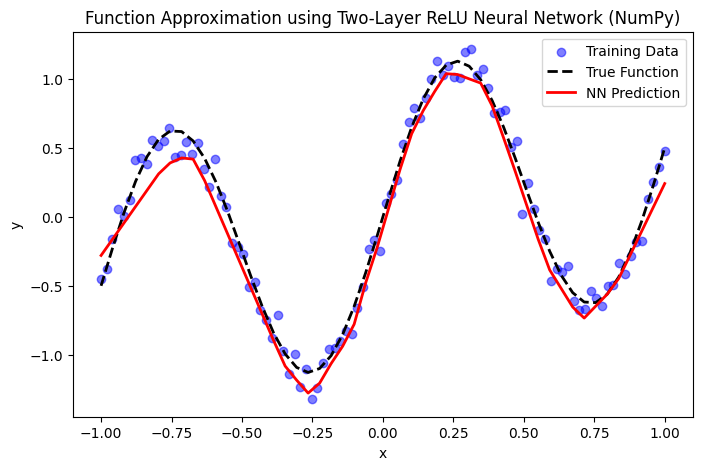

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

# 目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x

# 生成数据
num_train, num_test = 100, 50
x_train = np.linspace(-1, 1, num_train).reshape(-1, 1)
y_train = target_function(x_train) + 0.1 * np.random.randn(num_train, 1)
x_test = np.linspace(-1, 1, num_test).reshape(-1, 1)
y_test = target_function(x_test)

# 两层隐藏层结构
input_size = 1
hidden_size1 = 50  # 第一层隐藏层
hidden_size2 = 30  # 第二层隐藏层
output_size = 1

# Xavier 初始化
W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size1))

W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2 / hidden_size1)
b2 = np.zeros((1, hidden_size2))

W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2 / hidden_size2)
b3 = np.zeros((1, output_size))

# ReLU 及其梯度
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# 训练参数
learning_rate = 0.05
epochs = 5000

# 训练
for epoch in range(epochs):
    # 前向传播
    z1 = x_train @ W1 + b1
    a1 = relu(z1)  # 第一层 ReLU

    z2 = a1 @ W2 + b2
    a2 = relu(z2)  # 第二层 ReLU

    z3 = a2 @ W3 + b3  # 线性输出层
    y_pred = z3  

    # 计算损失
    loss = np.mean((y_pred - y_train) ** 2)

    # 反向传播
    grad_y_pred = 2 * (y_pred - y_train) / num_train  # dL/dy_pred

    grad_W3 = a2.T @ grad_y_pred
    grad_b3 = np.sum(grad_y_pred, axis=0, keepdims=True)

    grad_a2 = grad_y_pred @ W3.T
    grad_z2 = grad_a2 * relu_derivative(z2)

    grad_W2 = a1.T @ grad_z2
    grad_b2 = np.sum(grad_z2, axis=0, keepdims=True)

    grad_a1 = grad_z2 @ W2.T
    grad_z1 = grad_a1 * relu_derivative(z1)

    grad_W1 = x_train.T @ grad_z1
    grad_b1 = np.sum(grad_z1, axis=0, keepdims=True)

    # 参数更新
    W1 -= learning_rate * grad_W1
    b1 -= learning_rate * grad_b1
    W2 -= learning_rate * grad_W2
    b2 -= learning_rate * grad_b2
    W3 -= learning_rate * grad_W3
    b3 -= learning_rate * grad_b3

    # 打印损失
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

# 测试
z1_test = x_test @ W1 + b1
a1_test = relu(z1_test)

z2_test = a1_test @ W2 + b2
a2_test = relu(z2_test)

z3_test = a2_test @ W3 + b3
y_test_pred = z3_test

# 可视化
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, label="Training Data", color="blue", alpha=0.5)
plt.plot(x_test, y_test, label="True Function", color="black", linestyle="dashed", linewidth=2)
plt.plot(x_test, y_test_pred, label="NN Prediction", color="red", linewidth=2)
plt.legend()
plt.title("Function Approximation using Two-Layer ReLU Neural Network (NumPy)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
